In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

570

In [7]:
# Import the requests library
import requests

#Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3338f1eb6e0659d3b585d14c3d0e696f


In [9]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3338f1eb6e0659d3b585d14c3d0e696f&q=Boston


In [12]:
city_weather = requests.get(http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3338f1eb6e0659d3b585d14c3d0e696f&q=Boston)

SyntaxError: invalid syntax (<ipython-input-12-bb84f71ebdd9>, line 1)

In [13]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 53.46,
  'feels_like': 42.42,
  'temp_min': 51.8,
  'temp_max': 55,
  'pressure': 1024,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 17.22, 'deg': 80},
 'clouds': {'all': 90},
 'dt': 1602556984,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1602500038,
  'sunset': 1602540413},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | tasiilaq
Processing Record 2 of Set 12 | puerto ayora
Processing Record 3 of Set 12 | galveston
Processing Record 4 of Set 12 | albany
Processing Record 5 of Set 12 | wolfville
Processing Record 6 of Set 12 | kristiansund
Processing Record 7 of Set 12 | rikitea
Processing Record 8 of Set 12 | dubreka
Processing Record 9 of Set 12 | hermanus
Processing Record 10 of Set 12 | ajdabiya
Processing Record 11 of Set 12 | bairiki
Processing Record 12 of Set 12 | kawalu
Processing Record 13 of Set 12 | punta arenas
Processing Record 14 of Set 12 | acajutla
Processing Record 15 of Set 12 | bethel
Processing Record 16 of Set 12 | cherskiy
Processing Record 17 of Set 12 | torbay
Processing Record 18 of Set 12 | chokurdakh
Processing Record 19 of Set 12 | atuona
Processing Record 20 of Set 12 | majene
Processing Record 21 of Set 12 | ribeira grande
Processing Record 22 of Set 12 | nikolskoye
Processing Recor

Processing Record 31 of Set 15 | kasongo
Processing Record 32 of Set 15 | qasigiannguit
Processing Record 33 of Set 15 | dakar
Processing Record 34 of Set 15 | vila do maio
Processing Record 35 of Set 15 | kahului
Processing Record 36 of Set 15 | nemuro
Processing Record 37 of Set 15 | bilibino
Processing Record 38 of Set 15 | tura
Processing Record 39 of Set 15 | anori
Processing Record 40 of Set 15 | takhtamygda
Processing Record 41 of Set 15 | escarcega
Processing Record 42 of Set 15 | paamiut
Processing Record 43 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 15 | codrington
Processing Record 45 of Set 15 | dikson
Processing Record 46 of Set 15 | tabou
Processing Record 47 of Set 15 | kholtoson
Processing Record 48 of Set 15 | maksatikha
Processing Record 49 of Set 15 | havoysund
Processing Record 50 of Set 15 | katsuura
Processing Record 1 of Set 16 | barrow
Processing Record 2 of Set 16 | novikovo
Processing Record 3 of Set 16 | cobija
Processing

Processing Record 19 of Set 19 | luderitz
Processing Record 20 of Set 19 | palmas bellas
Processing Record 21 of Set 19 | malaya serdoba
Processing Record 22 of Set 19 | afmadu
City not found. Skipping...
Processing Record 23 of Set 19 | abadan
Processing Record 24 of Set 19 | tkvarcheli
City not found. Skipping...
Processing Record 25 of Set 19 | dhenkanal
Processing Record 26 of Set 19 | cozumel
Processing Record 27 of Set 19 | garowe
Processing Record 28 of Set 19 | tumannyy
City not found. Skipping...
Processing Record 29 of Set 19 | saint george
Processing Record 30 of Set 19 | buchanan
Processing Record 31 of Set 19 | cooma
Processing Record 32 of Set 19 | abrau-dyurso
Processing Record 33 of Set 19 | qaqortoq
Processing Record 34 of Set 19 | rawson
Processing Record 35 of Set 19 | gamba
Processing Record 36 of Set 19 | muros
Processing Record 37 of Set 19 | tikrit
Processing Record 38 of Set 19 | sabang
Processing Record 39 of Set 19 | nuevo progreso
Processing Record 40 of Set 

Processing Record 7 of Set 23 | alekseyevsk
Processing Record 8 of Set 23 | asau
Processing Record 9 of Set 23 | the valley
Processing Record 10 of Set 23 | virginia beach
Processing Record 11 of Set 23 | bonavista
Processing Record 12 of Set 23 | alihe
Processing Record 13 of Set 23 | verkhniye kigi
Processing Record 14 of Set 23 | ambilobe
Processing Record 15 of Set 23 | san quintin
Processing Record 16 of Set 23 | watsa
Processing Record 17 of Set 23 | puerto escondido
Processing Record 18 of Set 23 | bay roberts
Processing Record 19 of Set 23 | maralal
Processing Record 20 of Set 23 | maceio
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
len(city_data)

527

In [23]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,39.20,93,100,25.28,GL,2020-10-13 02:47:31
1,Puerto Ayora,-0.74,-90.35,70.00,90,37,5.01,EC,2020-10-13 02:46:38
2,Galveston,29.37,-94.97,81.00,83,1,8.05,US,2020-10-13 02:46:50
3,Albany,42.60,-73.97,53.01,66,99,7.72,US,2020-10-13 02:44:42
4,Wolfville,45.08,-64.37,42.01,86,0,4.16,CA,2020-10-13 02:45:37
5,Kristiansund,63.11,7.73,41.00,86,1,5.82,NO,2020-10-13 02:47:32
6,Rikitea,-23.12,-134.97,73.62,75,11,14.56,PF,2020-10-13 02:47:32
7,Dubreka,9.79,-13.52,74.82,91,100,3.85,GN,2020-10-13 02:47:32
8,Hermanus,-34.42,19.23,60.01,89,90,7.00,ZA,2020-10-13 02:47:33
9,Ajdabiya,30.76,20.23,73.90,49,1,6.51,LY,2020-10-13 02:47:33


In [28]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2020-10-13 02:47:31,65.61,-37.64,39.20,93,100,25.28
1,Puerto Ayora,EC,2020-10-13 02:46:38,-0.74,-90.35,70.00,90,37,5.01
2,Galveston,US,2020-10-13 02:46:50,29.37,-94.97,81.00,83,1,8.05
3,Albany,US,2020-10-13 02:44:42,42.60,-73.97,53.01,66,99,7.72
4,Wolfville,CA,2020-10-13 02:45:37,45.08,-64.37,42.01,86,0,4.16
...,...,...,...,...,...,...,...,...,...
522,Watsa,CD,2020-10-13 02:50:28,3.04,29.54,62.55,99,100,2.08
523,Puerto Escondido,MX,2020-10-13 02:46:06,15.85,-97.07,84.20,70,40,2.82
524,Bay Roberts,CA,2020-10-13 02:50:28,47.60,-53.26,42.01,52,19,8.12
525,Maralal,KE,2020-10-13 02:50:29,1.10,36.70,58.69,80,43,3.27


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time

In [34]:
# Get today's date in seconds.
today = time.time()
today

1602559413.0670254

In [35]:
today = time.strftime("%x")
today

'10/12/20'

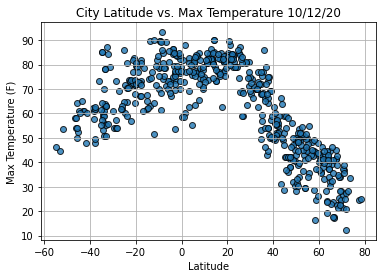

In [36]:
# Build the scatter plot for latitude vs. max temperate.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

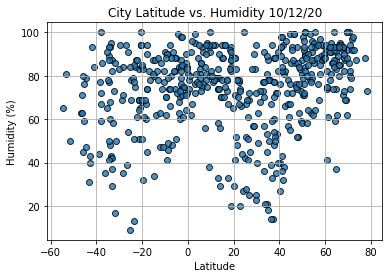

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

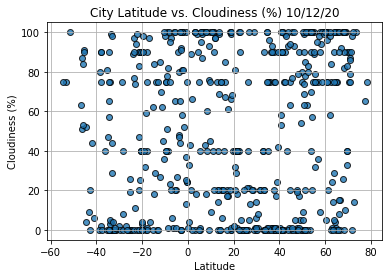

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

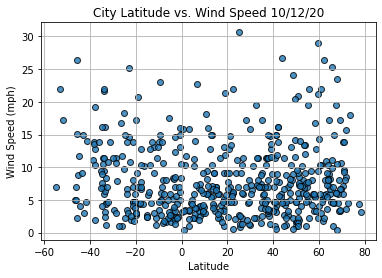

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()